In [138]:
import pandas as pd # для работы с таблицами
import numpy as np # для работы с работы с математикой

import plotly.express as px # для графиков
import plotly.graph_objects as go
import plotly.figure_factory as ff

import matplotlib.pyplot as plt
import seaborn as sns # для графиков

import plotly.express as px 
# Это особенные динамические графики, правда библиотека не в ходит в conda и её приходится устанавливать самостоятельно

In [139]:
%config InlineBackend.figure_format = 'retina'

sns.set(style='darkgrid', palette='deep')

plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.format'] = 'pdf'

## Шаг 1: Выбор темы

В качестве датасета мы выбрали таблицу продаж видео игр (https://www.kaggle.com/datasets/thedevastator/global-video-game-sales) 

## Шаг 2: сбор данных

Импортируем нашу таблицу и посмотрим на нее

In [140]:
df = pd.read_csv('vgsales.csv', sep=',')
df.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

## Шаг 3: предварительныя обработка

Узнаем размер таблицы

In [9]:
df.shape

(16598, 11)

Проверим есть ли пропуски в данных

In [10]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Видим, что пропуски есть в столбцах "Year" и "Publisher"

Посмотрим на данные строки

In [11]:
df[df['Year'].isnull() | df['Publisher'].isnull()]

Rank                             Name Platform    Year         Genre  \
179      180                  Madden NFL 2004      PS2     NaN        Sports   
377      378                 FIFA Soccer 2004      PS2     NaN        Sports   
431      432       LEGO Batman: The Videogame      Wii     NaN        Action   
470      471       wwe Smackdown vs. Raw 2006      PS2     NaN      Fighting   
607      608                   Space Invaders     2600     NaN       Shooter   
...      ...                              ...      ...     ...           ...   
16427  16430                     Virtua Quest       GC     NaN  Role-Playing   
16493  16496                       The Smurfs      3DS     NaN        Action   
16494  16497  Legends of Oz: Dorothy's Return      3DS  2014.0        Puzzle   
16543  16546           Driving Simulator 2011       PC  2011.0        Racing   
16553  16556                   Bound By Flame     X360  2014.0  Role-Playing   

                                    Publisher  NA_Sales  EU_Sales  JP_Sales  \
179                           Electronic Arts      4.26      0.26      0.01   
377                           Electronic Arts      0.59      2.36      0.04   
431    Warner Bros. Interactive Entertainment      1.86      1.02      0.00   
470                                       NaN      1.57      1.02      0.00   
607                                     Atari      2.36      0.14      0.00   
...                                       ...       ...       ...       ...   
16427                                 Unknown      0.01      0.00      0.00   
16493                                 Unknown      0.00      0.01      0.00   
16494                                     NaN      0.00      0.01      0.00   
16543                                     NaN      0.00      0.01      0.00   
16553                                     NaN      0.00      0.01      0.00   

       Other_Sales  Global_Sales  
179           0.71          5.23  
377           0.51          3.49  
431           0.29          3.17  
470           0.41          3.00  
607           0.03          2.53  
...            ...           ...  
16427         0.00          0.01  
16493         0.00          0.01  
16494         0.00          0.01  
16543         0.00          0.01  
16553         0.00          0.01  

[307 rows x 11 columns]

Так как все пропущенные данные - не числовые, их следует удалить (к тому же их небольшое количество)

In [141]:
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)
df.shape

(16291, 11)

Видим, что количество оставшихся данных сошлось с предпологаемым ($16598 - 307 = 16291$), значит все в порядке.

Посмотрим на общую информацию во всей таблице и если что изменим типы данных в некоторых столбцах

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16291 entries, 0 to 16290
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Заметим, что данные в столбце "Year" имеют тип данных float. Давайте поменяем его на тип данных int.

In [142]:
df['Year'] = df['Year'].astype(int)
df

Rank                                              Name Platform  Year  \
0          1                                        Wii Sports      Wii  2006   
1          2                                 Super Mario Bros.      NES  1985   
2          3                                    Mario Kart Wii      Wii  2008   
3          4                                 Wii Sports Resort      Wii  2009   
4          5                          Pokemon Red/Pokemon Blue       GB  1996   
...      ...                                               ...      ...   ...   
16286  16596                Woody Woodpecker in Crazy Castle 5      GBA  2002   
16287  16597                     Men in Black II: Alien Escape       GC  2003   
16288  16598  SCORE International Baja 1000: The Official Game      PS2  2008   
16289  16599                                        Know How 2       DS  2010   
16290  16600                                  Spirits & Spells      GBA  2003   

              Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0            Sports    Nintendo     41.49     29.02      3.77         8.46   
1          Platform    Nintendo     29.08      3.58      6.81         0.77   
2            Racing    Nintendo     15.85     12.88      3.79         3.31   
3            Sports    Nintendo     15.75     11.01      3.28         2.96   
4      Role-Playing    Nintendo     11.27      8.89     10.22         1.00   
...             ...         ...       ...       ...       ...          ...   
16286      Platform       Kemco      0.01      0.00      0.00         0.00   
16287       Shooter  Infogrames      0.01      0.00      0.00         0.00   
16288        Racing  Activision      0.00      0.00      0.00         0.00   
16289        Puzzle    7G//AMES      0.00      0.01      0.00         0.00   
16290      Platform     Wanadoo      0.01      0.00      0.00         0.00   

       Global_Sales  
0             82.74  
1             40.24  
2             35.82  
3             33.00  
4             31.37  
...             ...  
16286          0.01  
16287          0.01  
16288          0.01  
16289          0.01  
16290          0.01  

[16291 rows x 11 columns]

Замечательно, теперь данные откорректированы и мы готовы к их дальнейшему анализу :)

## Шаг 5: создание новых признаков

Да да, мы решили сразу создать пару новых признаков, для того чтобы в шаге для визуализаций сразу исследовать и их и находить дополнительные закономерности)

Нам захотелось исследовать влияние длины названия игры на различные показатели, поэтому мы решили добавить соответственный столбец к нашим данным - 'Name_length'.

In [143]:
df['Name_length'] = df['Name'].str.len() - df['Name'].str.count(' ')
df

Rank                                              Name Platform  Year  \
0          1                                        Wii Sports      Wii  2006   
1          2                                 Super Mario Bros.      NES  1985   
2          3                                    Mario Kart Wii      Wii  2008   
3          4                                 Wii Sports Resort      Wii  2009   
4          5                          Pokemon Red/Pokemon Blue       GB  1996   
...      ...                                               ...      ...   ...   
16286  16596                Woody Woodpecker in Crazy Castle 5      GBA  2002   
16287  16597                     Men in Black II: Alien Escape       GC  2003   
16288  16598  SCORE International Baja 1000: The Official Game      PS2  2008   
16289  16599                                        Know How 2       DS  2010   
16290  16600                                  Spirits & Spells      GBA  2003   

              Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0            Sports    Nintendo     41.49     29.02      3.77         8.46   
1          Platform    Nintendo     29.08      3.58      6.81         0.77   
2            Racing    Nintendo     15.85     12.88      3.79         3.31   
3            Sports    Nintendo     15.75     11.01      3.28         2.96   
4      Role-Playing    Nintendo     11.27      8.89     10.22         1.00   
...             ...         ...       ...       ...       ...          ...   
16286      Platform       Kemco      0.01      0.00      0.00         0.00   
16287       Shooter  Infogrames      0.01      0.00      0.00         0.00   
16288        Racing  Activision      0.00      0.00      0.00         0.00   
16289        Puzzle    7G//AMES      0.00      0.01      0.00         0.00   
16290      Platform     Wanadoo      0.01      0.00      0.00         0.00   

       Global_Sales  Name_length  
0             82.74            9  
1             40.24           15  
2             35.82           12  
3             33.00           15  
4             31.37           22  
...             ...          ...  
16286          0.01           29  
16287          0.01           24  
16288          0.01           42  
16289          0.01            8  
16290          0.01           14  

[16291 rows x 12 columns]

## Шаг 4: визуализация

4.1 ***Проведем EDA. Для начала воспользуемся одномерным анализом и пройдемся по каждому из показателей.***

- 4.1.1 **Визуализируем данные по жанрам игр. Посмотрим как часто встречаются те или иные жанры.**

Text(0, 0.5, '')

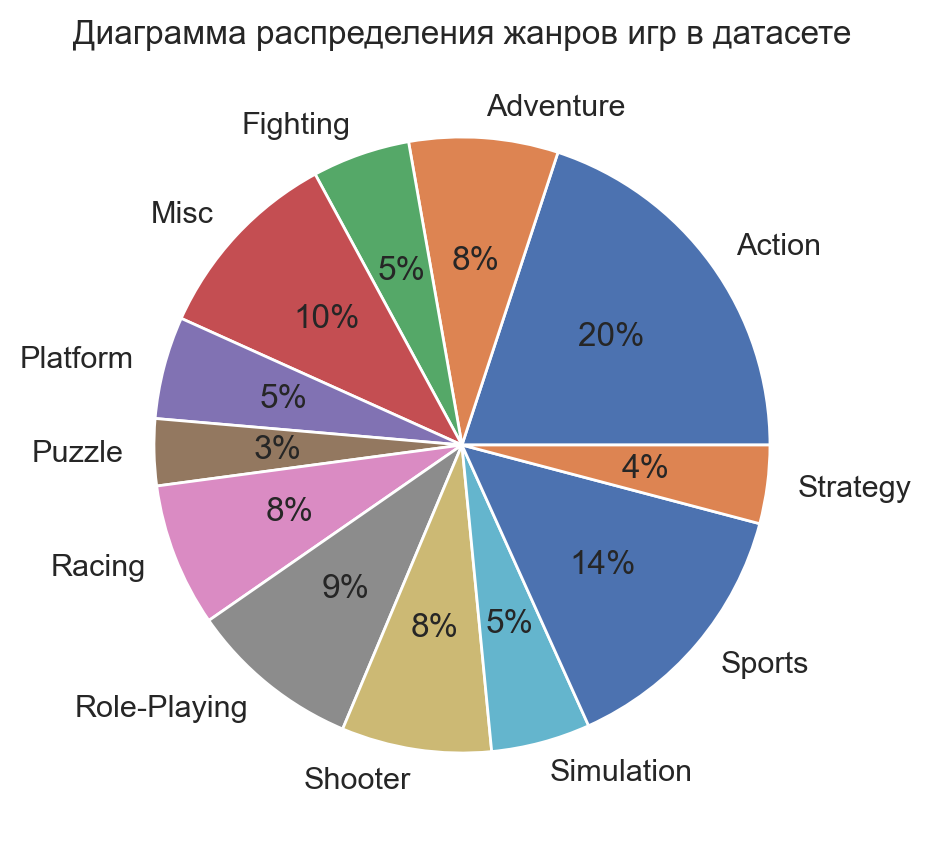

In [88]:
df_genres = df['Genre'].value_counts().reset_index()
df_genres.columns = ['Genre', 'Count']
df_genres.groupby(['Genre']).sum().plot(kind = 'pie', y = 'Count', autopct = '%1.0f%%', title = 'Диаграмма распределения жанров игр в датасете')
plt.legend('', frameon=False)
plt.ylabel("")

- 4.1.2 **Визуализируем данные по годам. Посмотрим как часто выпускались игры в разных годах.**

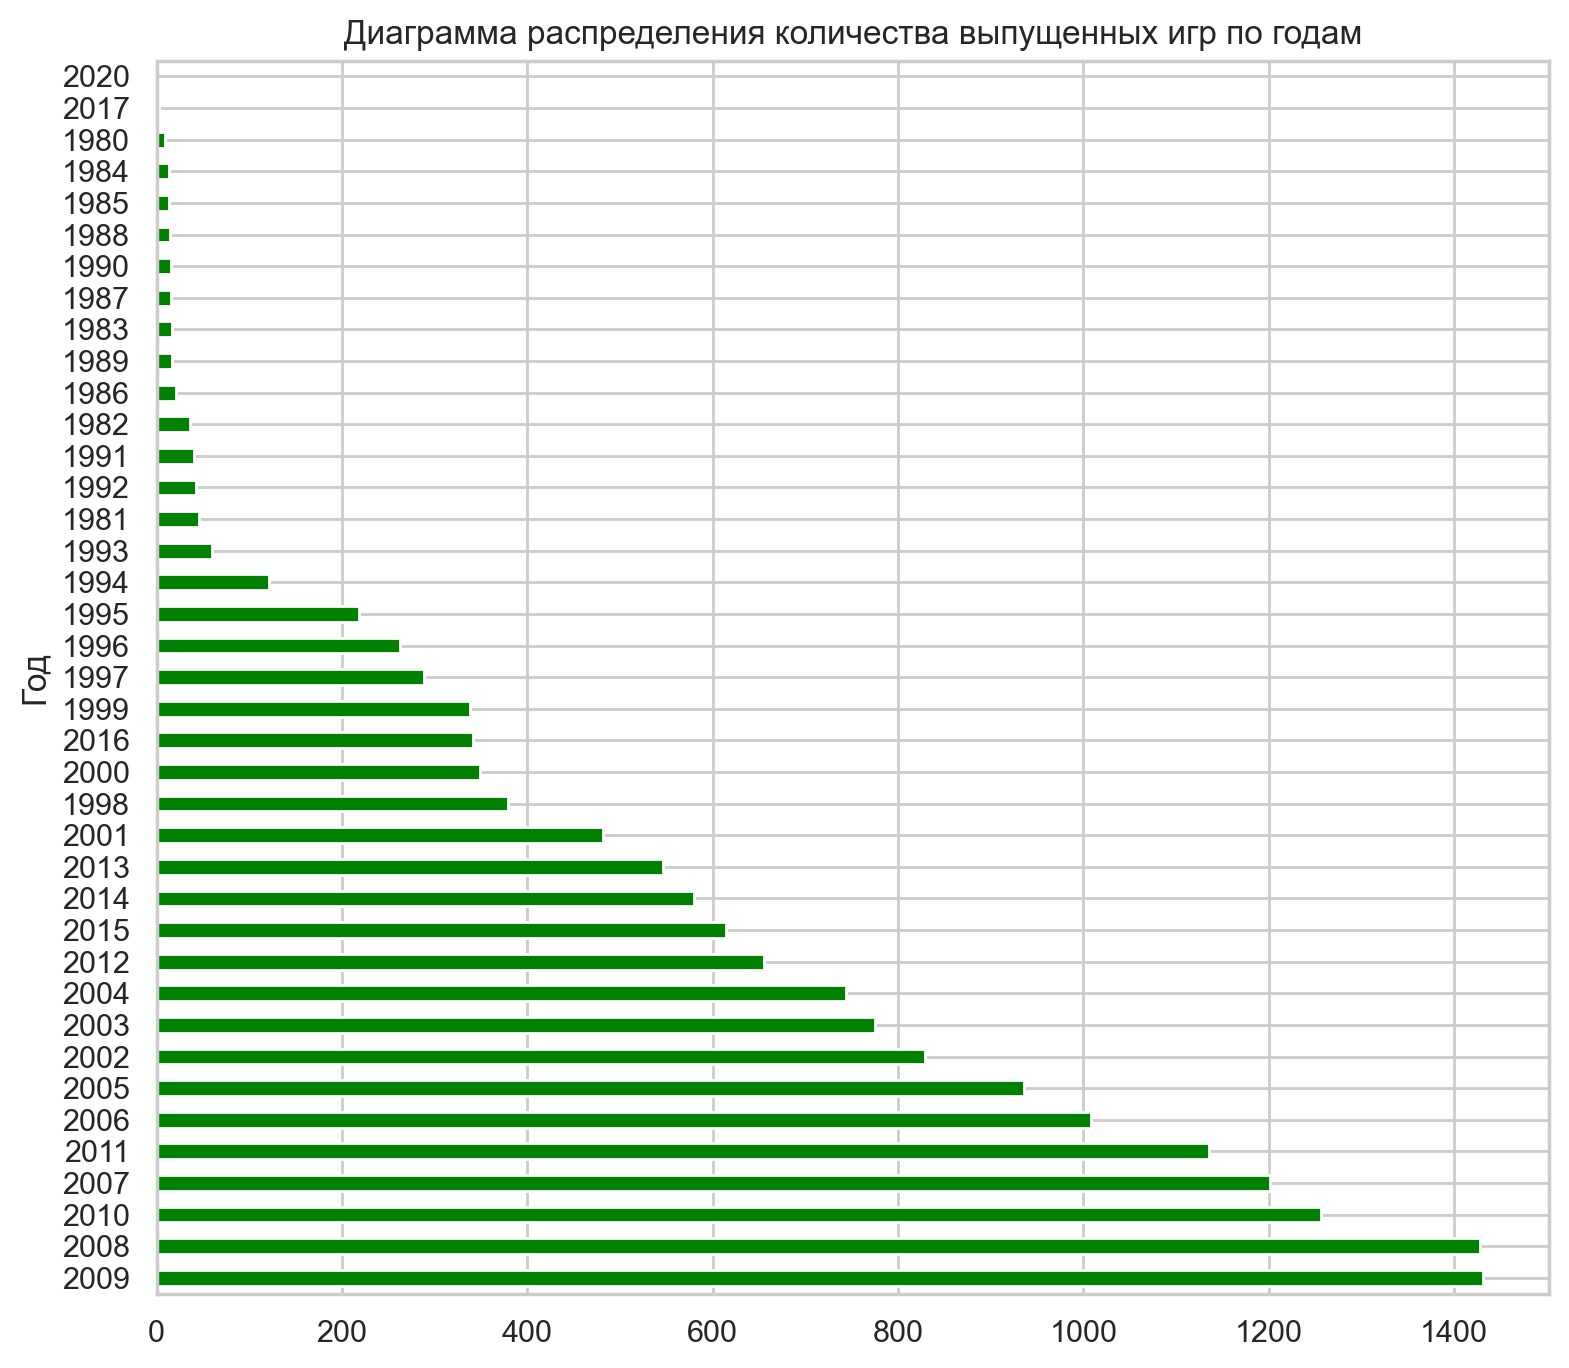

In [73]:
df_years = df['Year'].value_counts().reset_index()
df_years.columns = ['Year', 'Number of games']
df_years.plot.barh(x = 'Year', y = 'Number of games', title = 'Диаграмма распределения количества выпущенных игр по годам', color='green', figsize = (8, 7), ylabel = 'Количество игр, шт.', xlabel = 'Год')
plt.legend('', frameon=False)
plt.tight_layout()

- 4.1.3 **Визуализируем данные по платформам, на которых выпускались игры. Посмотрим на количество игр, выпущенных на разных платформах.**

In [19]:
df_platforms = df['Platform'].value_counts().reset_index()
df_platforms.columns = ['Platform', 'Games_amount']
df_platforms

Platform  Games_amount
0        DS          2131
1       PS2          2127
2       PS3          1304
3       Wii          1290
4      X360          1234
5       PSP          1197
6        PS          1189
7        PC           938
8        XB           803
9       GBA           786
10       GC           542
11      3DS           499
12      PSV           410
13      PS4           336
14      N64           316
15     SNES           239
16     XOne           213
17      SAT           173
18     WiiU           143
19     2600           116
20      NES            98
21       GB            97
22       DC            52
23      GEN            27
24       NG            12
25      SCD             6
26       WS             6
27      3DO             3
28     TG16             2
29       GG             1
30     PCFX             1

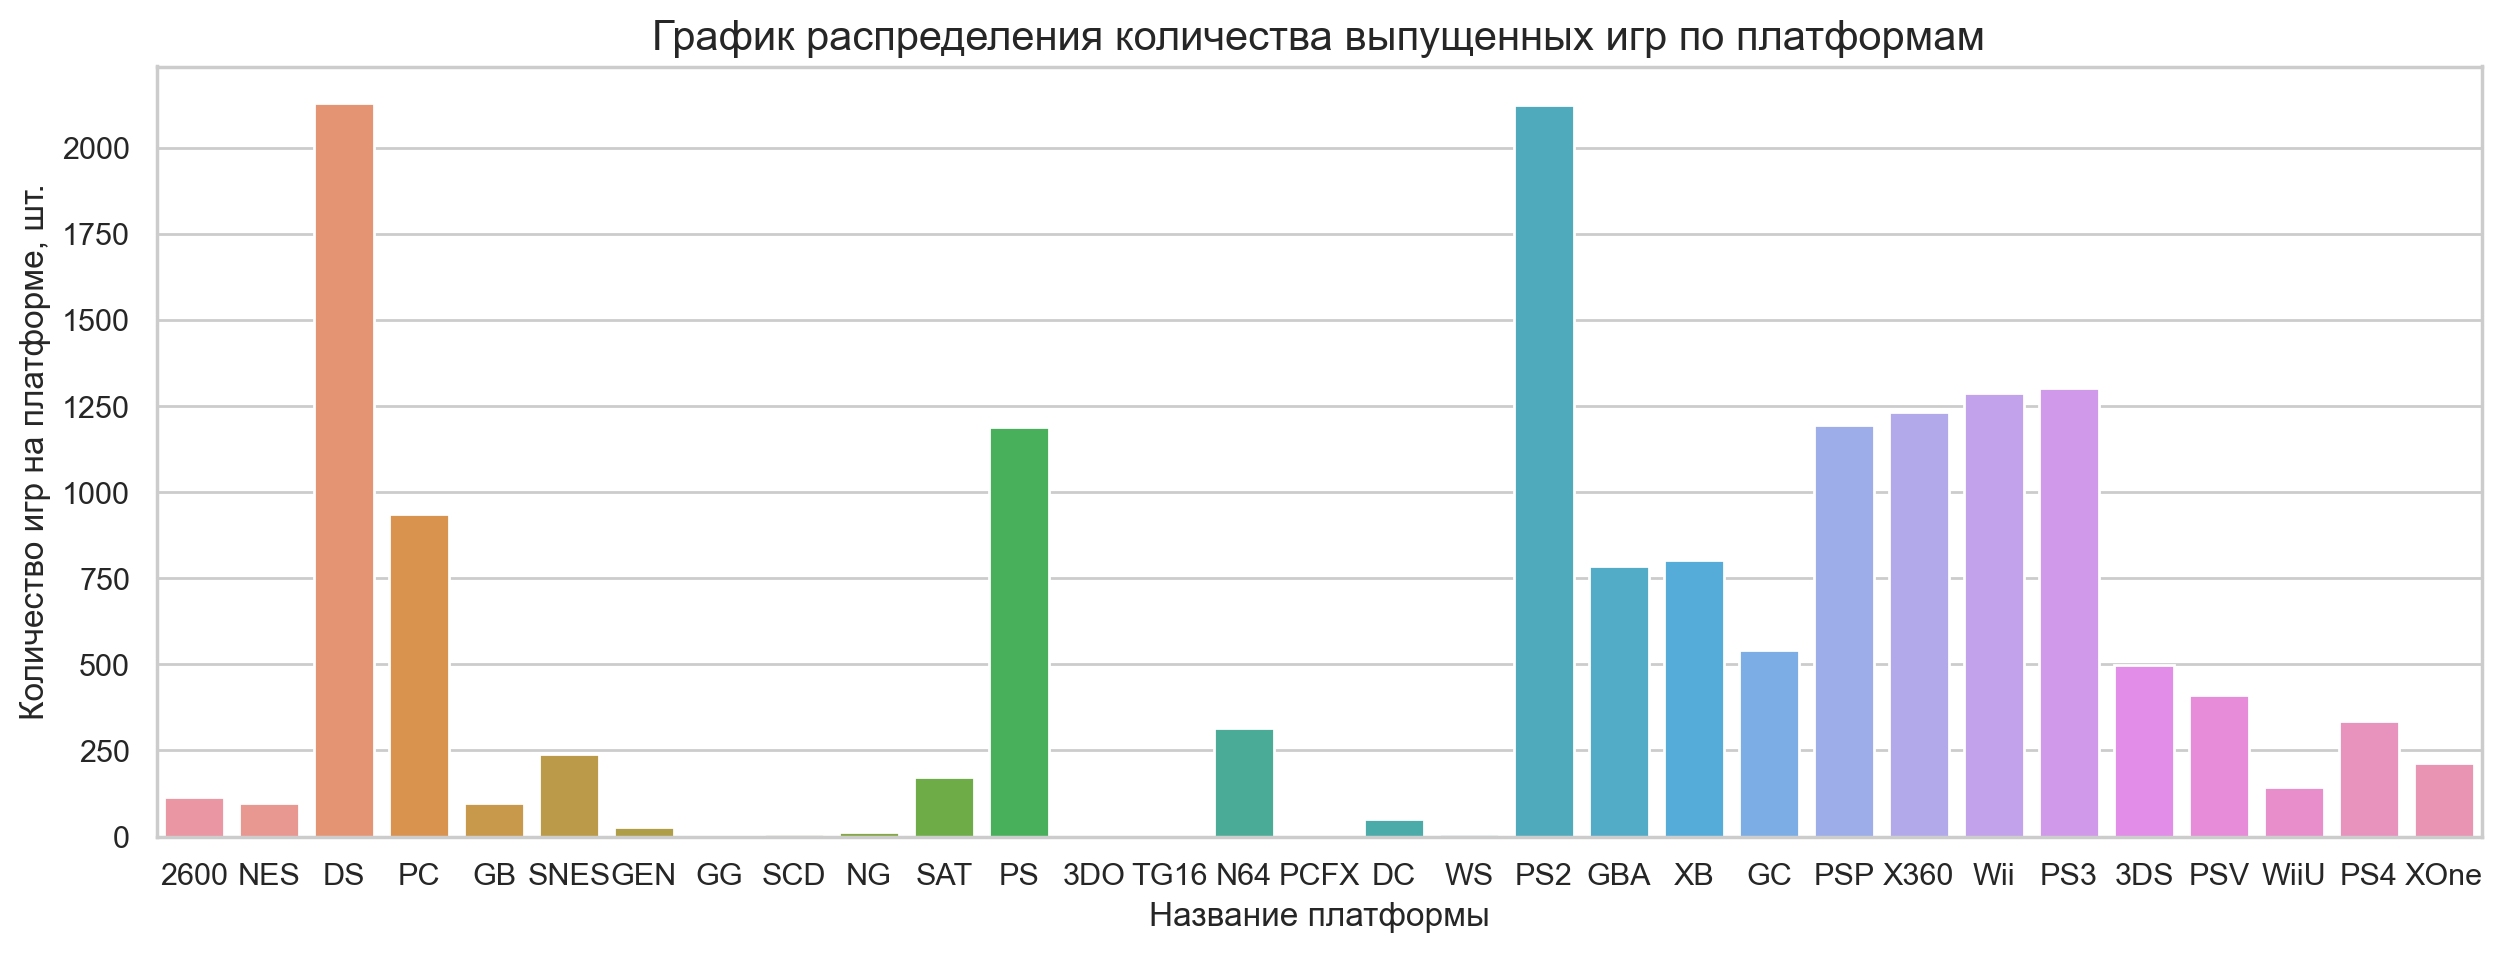

In [78]:
sns.set_style('whitegrid')
plt.figure(figsize=(15, 5))
plt.title('График распределения количества выпущенных игр по платформам', size = 15)
sns.countplot(x = 'Platform', data = df)
plt.xlabel('Название платформы')
plt.ylabel('Количество игр на платформе, шт.')
plt.show() 

Как видно из графика и таблицы, есть платформы на которых выпускалось крайне малое количество игр по сравнению с другими платформами.

- 3.1.4 **Визуализируем данные по регионам, в которых продавались игры. Посмотрим на количество игр, проданных в разных частях Света.**

Text(0, 0.5, '')

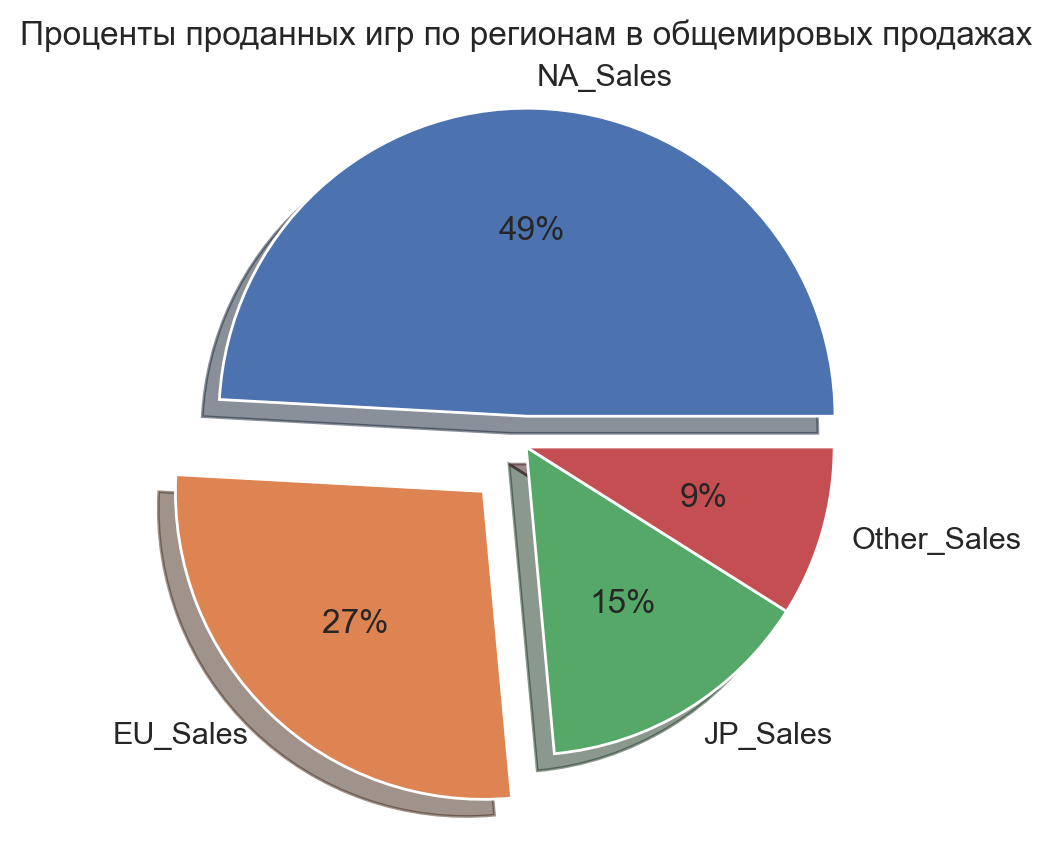

In [87]:
gr_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
gr_sales_explode = (0.1, 0.2, 0, 0)
gr_sales.plot(kind='pie', title='Проценты проданных игр по регионам в общемировых продажах', autopct = '%1.0f%%', shadow=True, explode=gr_sales_explode)
plt.ylabel("")

<AxesSubplot:>

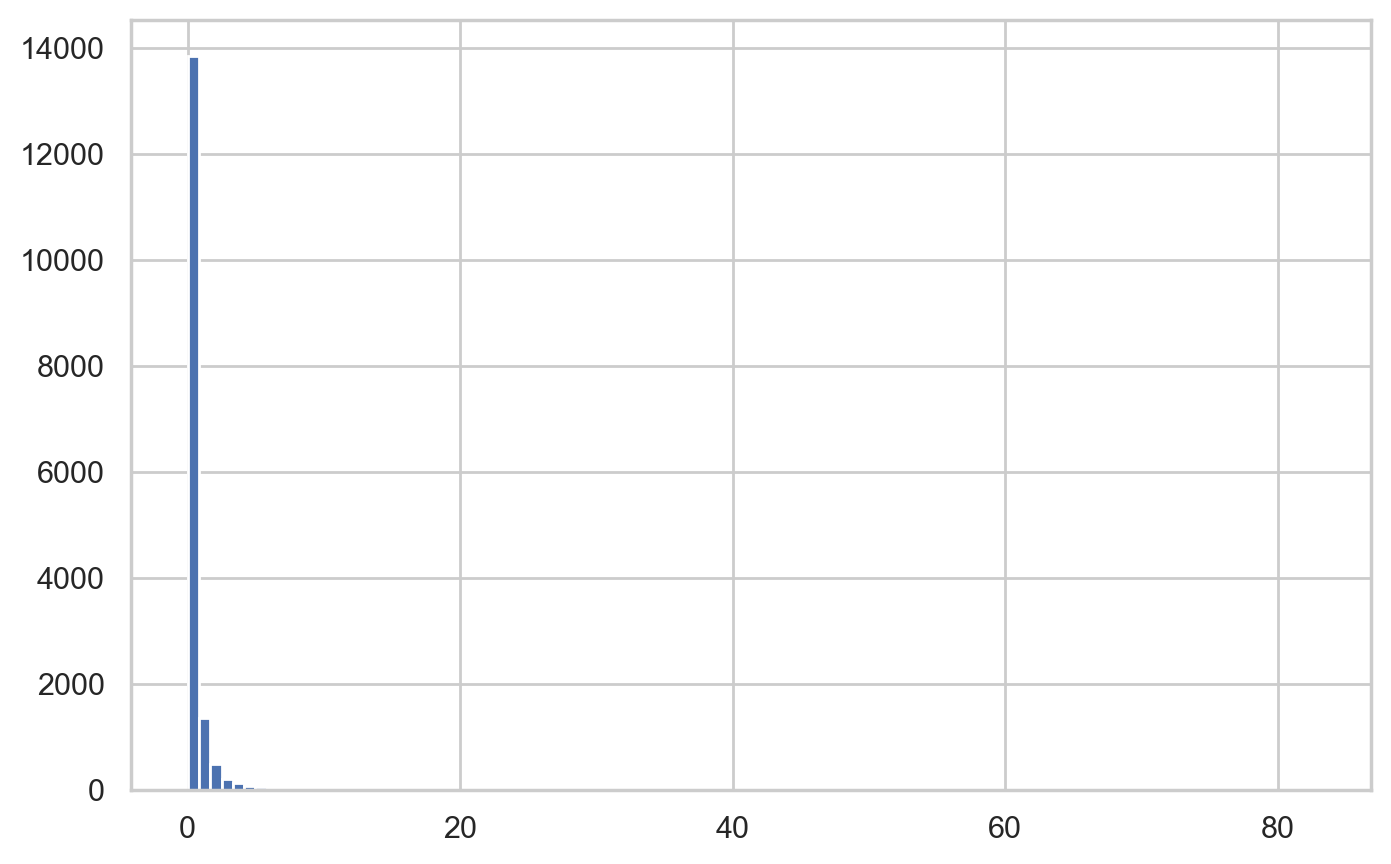

In [31]:
df['Global_Sales'].hist(bins = 100)

Отсюда видно, что большая часть выпущенных игр продалась тиражом меньше 1 млн копий.

4.2 ***Теперь проведем многомерные визуализации данных и попытаемся найти закономерности в них.***

- 4.2.1.1 **Для начала проведем сортировку данных по годам, чтобы в последующем построить корректные графики изменения данных по годам.**

In [32]:
df = df.sort_values(by = 'Year', ascending=True)
df

Rank                                              Name Platform  Year  \
257      259                                         Asteroids     2600  1980   
6211    6319                                            Bridge     2600  1980   
1948    1971                                          Defender     2600  1980   
5282    5368                                           Freeway     2600  1980   
1746    1768                                           Kaboom!     2600  1980   
...      ...                                               ...      ...   ...   
5205    5290                                    Star Fox: Zero     WiiU  2016   
14136  14393  Phantasy Star Online 2 Episode 4: Deluxe Package      PS4  2017   
16135  16441                  Brothers Conflict: Precious Baby      PSV  2017   
15944  16244  Phantasy Star Online 2 Episode 4: Deluxe Package      PSV  2017   
5860    5959                            Imagine: Makeup Artist       DS  2020   

              Genre     Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
257         Shooter         Atari      4.00      0.26      0.00         0.05   
6211           Misc    Activision      0.25      0.02      0.00         0.00   
1948           Misc         Atari      0.99      0.05      0.00         0.01   
5282         Action    Activision      0.32      0.02      0.00         0.00   
1746           Misc    Activision      1.07      0.07      0.00         0.01   
...             ...           ...       ...       ...       ...          ...   
5205        Shooter      Nintendo      0.16      0.10      0.07         0.03   
14136  Role-Playing          Sega      0.00      0.00      0.03         0.00   
16135        Action  Idea Factory      0.00      0.00      0.01         0.00   
15944  Role-Playing          Sega      0.00      0.00      0.01         0.00   
5860     Simulation       Ubisoft      0.27      0.00      0.00         0.02   

       Global_Sales  
257            4.31  
6211           0.27  
1948           1.05  
5282           0.34  
1746           1.15  
...             ...  
5205           0.35  
14136          0.03  
16135          0.01  
15944          0.01  
5860           0.29  

[16291 rows x 11 columns]

- 4.2.1.2 **Построим отдельный датафрейм для нескольких параметров из изначальной таблицы данных, чтобы использовать их для построения нового графика**

In [35]:
df_bt = df[['Publisher', 'Year', 'Global_Sales', 'Name_length']].copy()
df_bt['Games_Amount'] = 1
df_bt = df_bt.groupby(['Year', 'Publisher']).sum().reset_index()
df_bt['Name_length'] = df_bt['Name_length'] / df_bt['Games_Amount']
df_bt.columns = ['Year', 'Publisher', 'Global_Sales_per_year', 'Mean_name_length', 'Total_games_amount_per_year']
df_bt

Year                     Publisher  Global_Sales_per_year  \
0     1980                    Activision                   3.02   
1     1980                         Atari                   8.36   
2     1981  20th Century Fox Video Games                   1.35   
3     1981                    Activision                   8.50   
4     1981                         Atari                   8.45   
...    ...                           ...                    ...   
2316  2016                          Yeti                   0.02   
2317  2016               dramatic create                   0.03   
2318  2017                  Idea Factory                   0.01   
2319  2017                          Sega                   0.04   
2320  2020                       Ubisoft                   0.29   

      Mean_name_length  Total_games_amount_per_year  
0             7.000000                            5  
1             9.750000                            4  
2            10.000000                            3  
3             9.500000                            6  
4            14.545455                           11  
...                ...                          ...  
2316         11.000000                            1  
2317         35.000000                            2  
2318         29.000000                            1  
2319         41.000000                            2  
2320         20.000000                            1  

[2321 rows x 5 columns]

Мы дополнительно просуммировали все данные кроме годов и издателей для построеня будущего графика (в нем мы используем суммарные показатели по общим продажам, средней длине названия и количество игр, выпущенных в данный год).

- 4.2.1.3 **Данный график отображает изменения показателя суммарного количества игр в зависимости от средней длины названия игр, выпущенных одной компанией, сквозь различные года**

In [36]:
import plotly.express as px
fig = px.scatter(df_bt, x = 'Mean_name_length', y = 'Global_Sales_per_year', animation_frame = 'Year', color = 'Publisher', size = 'Total_games_amount_per_year')
fig.show()

Также заметим, что радиус кругов отображает количество выпущенных игр данной компанией за этот год. (К сожалению, по какой-то причине на графике показываются только 2 компании для всех лет. Мы пытались исправить данную проблему, но так и не смогли. Может Вы могли бы подсказать в чем загвоздка?) )

- 4.2.2.1 **Аналогично предыдущему графику подготавливаем необходимые данные**

In [37]:
df_gg = df[['Genre', 'Global_Sales', 'Year']].copy()
df_gg = df_gg.groupby(['Genre', 'Year']).sum().reset_index()
df_gg

Genre  Year  Global_Sales
0      Action  1980          0.34
1      Action  1981         14.84
2      Action  1982          6.52
3      Action  1983          2.86
4      Action  1984          1.85
..        ...   ...           ...
384  Strategy  2012          3.33
385  Strategy  2013          6.33
386  Strategy  2014          0.99
387  Strategy  2015          1.82
388  Strategy  2016          0.50

[389 rows x 3 columns]

- 4.2.2.2 **Данный график отображает суммарное количество проданных игр конкретным жанром сквозь года**

In [38]:
import plotly.express as px

fig = px.bar(df_gg, x = "Genre", y = "Global_Sales", color = "Genre", animation_frame = "Year")
fig.show()

- 4.2.3 **Для большей наглядности взаимосвязи данных дополнительно нарисуем корреляционную матрицу для продаж игр в разных частях Света**

In [39]:
df_c = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].copy()
corr = df_c.corr()
corr.style.background_gradient(cmap='coolwarm')

Заметим, что наибольший коэффициент с глобальными продажами имеют продажи в Северной Америке, что может означать, что именно данная часть Света имеет одно из наибольших влияний на продажи и разработку игр.

- 4.2.4 **Рассмотрим взаимосвязь между данными о длине названий игр и их общих продаж**

Для начала посмотрим количество уникальных названий игр, так как некоторые из них выпускались одновременно на нескольких платформах. В ином случае мы получим несколько значений продаж для одной и той же игры, а нам важны лишь ее суммарные продажи.

In [41]:
len(df['Name'].unique())

11325

Видим, что всего было выпущено 11325 игр с уникальными названиями.

Создадим отдельный датасет для работы только с названиями игр и количеством проданных копий.

In [43]:
df_new = df[['Name', 'Global_Sales']].copy()
df_new

Name  Global_Sales
257                                           Asteroids          4.31
6211                                             Bridge          0.27
1948                                           Defender          1.05
5282                                            Freeway          0.34
1746                                            Kaboom!          1.15
...                                                 ...           ...
5205                                     Star Fox: Zero          0.35
14136  Phantasy Star Online 2 Episode 4: Deluxe Package          0.03
16135                  Brothers Conflict: Precious Baby          0.01
15944  Phantasy Star Online 2 Episode 4: Deluxe Package          0.01
5860                             Imagine: Makeup Artist          0.29

[16291 rows x 2 columns]

Теперь просуммируем продажи игр с одинаковыми названиями.

In [44]:
df_new = df_new.groupby('Name').sum().reset_index()
df_new

Name  Global_Sales
0                                  '98 Koshien          0.41
1                   .hack//G.U. Vol.1//Rebirth          0.17
2                 .hack//G.U. Vol.2//Reminisce          0.23
3      .hack//G.U. Vol.2//Reminisce (jp sales)          0.16
4                .hack//G.U. Vol.3//Redemption          0.17
...                                        ...           ...
11320                       thinkSMART FAMILY!          0.03
11321               thinkSMART: Chess for Kids          0.01
11322                             uDraw Studio          2.46
11323             uDraw Studio: Instant Artist          0.21
11324             ¡Shin Chan Flipa en colores!          0.14

[11325 rows x 2 columns]

Как видим, мы получили 11325 строк - столько же, сколько всего было уникальных игр, то есть всё корректно.

Теперь достроим отдельный столбец с длиной названий игр.

In [45]:
df_new['Name_length'] = df_new['Name'].str.len() - df_new['Name'].str.count(' ')
df_new

Name  Global_Sales  Name_length
0                                  '98 Koshien          0.41           10
1                   .hack//G.U. Vol.1//Rebirth          0.17           25
2                 .hack//G.U. Vol.2//Reminisce          0.23           27
3      .hack//G.U. Vol.2//Reminisce (jp sales)          0.16           36
4                .hack//G.U. Vol.3//Redemption          0.17           28
...                                        ...           ...          ...
11320                       thinkSMART FAMILY!          0.03           17
11321               thinkSMART: Chess for Kids          0.01           23
11322                             uDraw Studio          2.46           11
11323             uDraw Studio: Instant Artist          0.21           25
11324             ¡Shin Chan Flipa en colores!          0.14           24

[11325 rows x 3 columns]

Построим график зависимости продаж игр от длины их названия.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Мировые продажи, млн. копий')

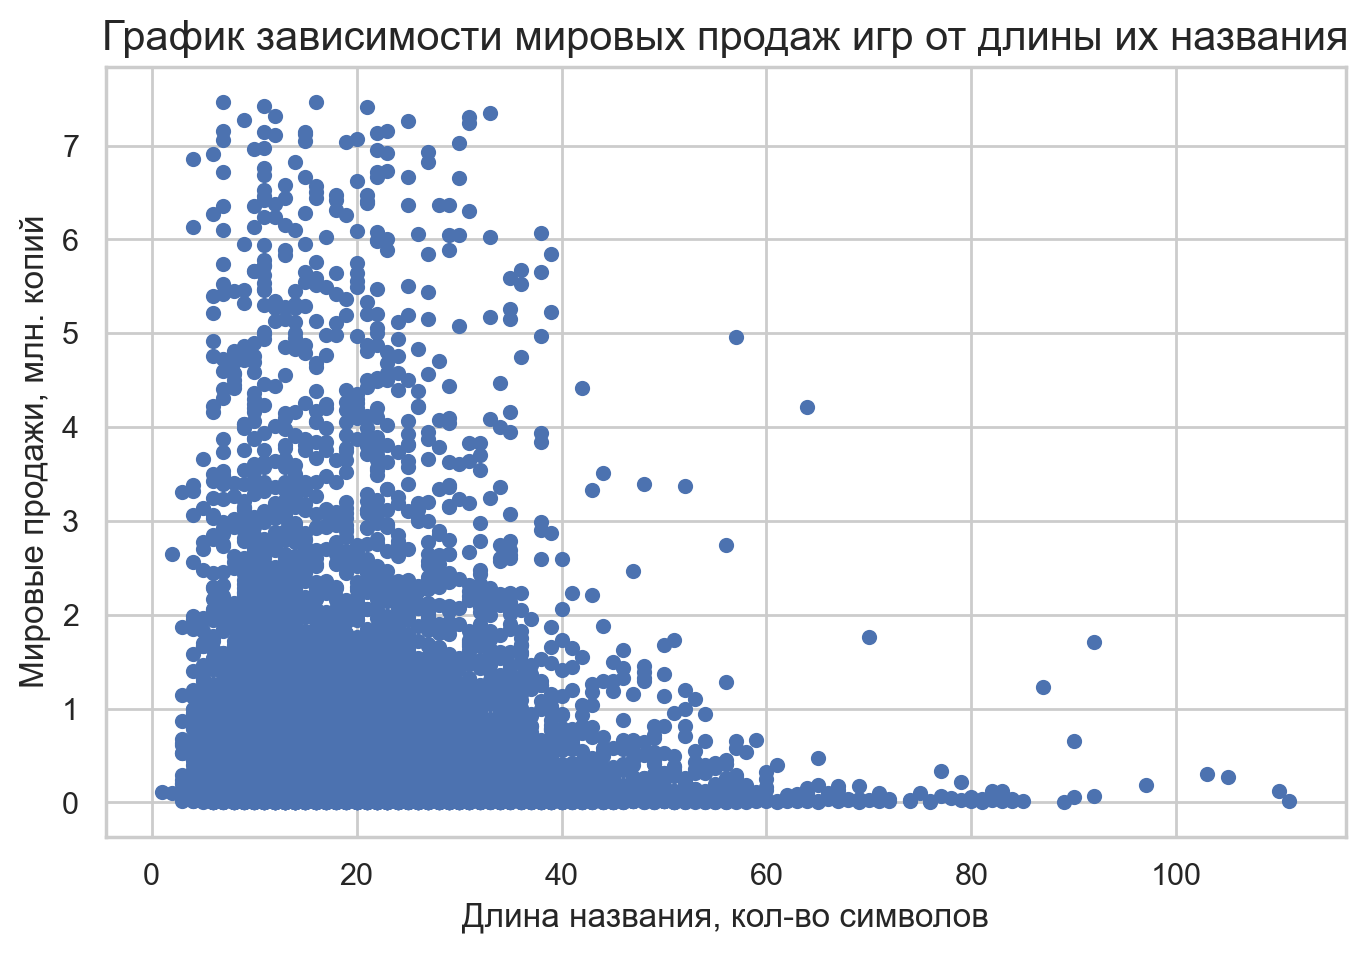

In [112]:
df_new.plot.scatter(x = 'Name_length', y = 'Global_Sales')
plt.title('График зависимости мировых продаж игр от длины их названия', size = 15)
plt.xlabel('Длина названия, кол-во символов')
plt.ylabel('Мировые продажи, млн. копий')

Из графика видно, что большая часть показателей по продажам находится ниже 20 млн копий. Создадим новый датасет с данным ограничением.

In [47]:
df_new = df_new[df_new['Global_Sales'] < 20]
df_new

Name  Global_Sales  Name_length
0                                  '98 Koshien          0.41           10
1                   .hack//G.U. Vol.1//Rebirth          0.17           25
2                 .hack//G.U. Vol.2//Reminisce          0.23           27
3      .hack//G.U. Vol.2//Reminisce (jp sales)          0.16           36
4                .hack//G.U. Vol.3//Redemption          0.17           28
...                                        ...           ...          ...
11320                       thinkSMART FAMILY!          0.03           17
11321               thinkSMART: Chess for Kids          0.01           23
11322                             uDraw Studio          2.46           11
11323             uDraw Studio: Instant Artist          0.21           25
11324             ¡Shin Chan Flipa en colores!          0.14           24

[11294 rows x 3 columns]

Нарисуем график, аналогичный предыдущему для нового датасета.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Мировые продажи, млн. копий')

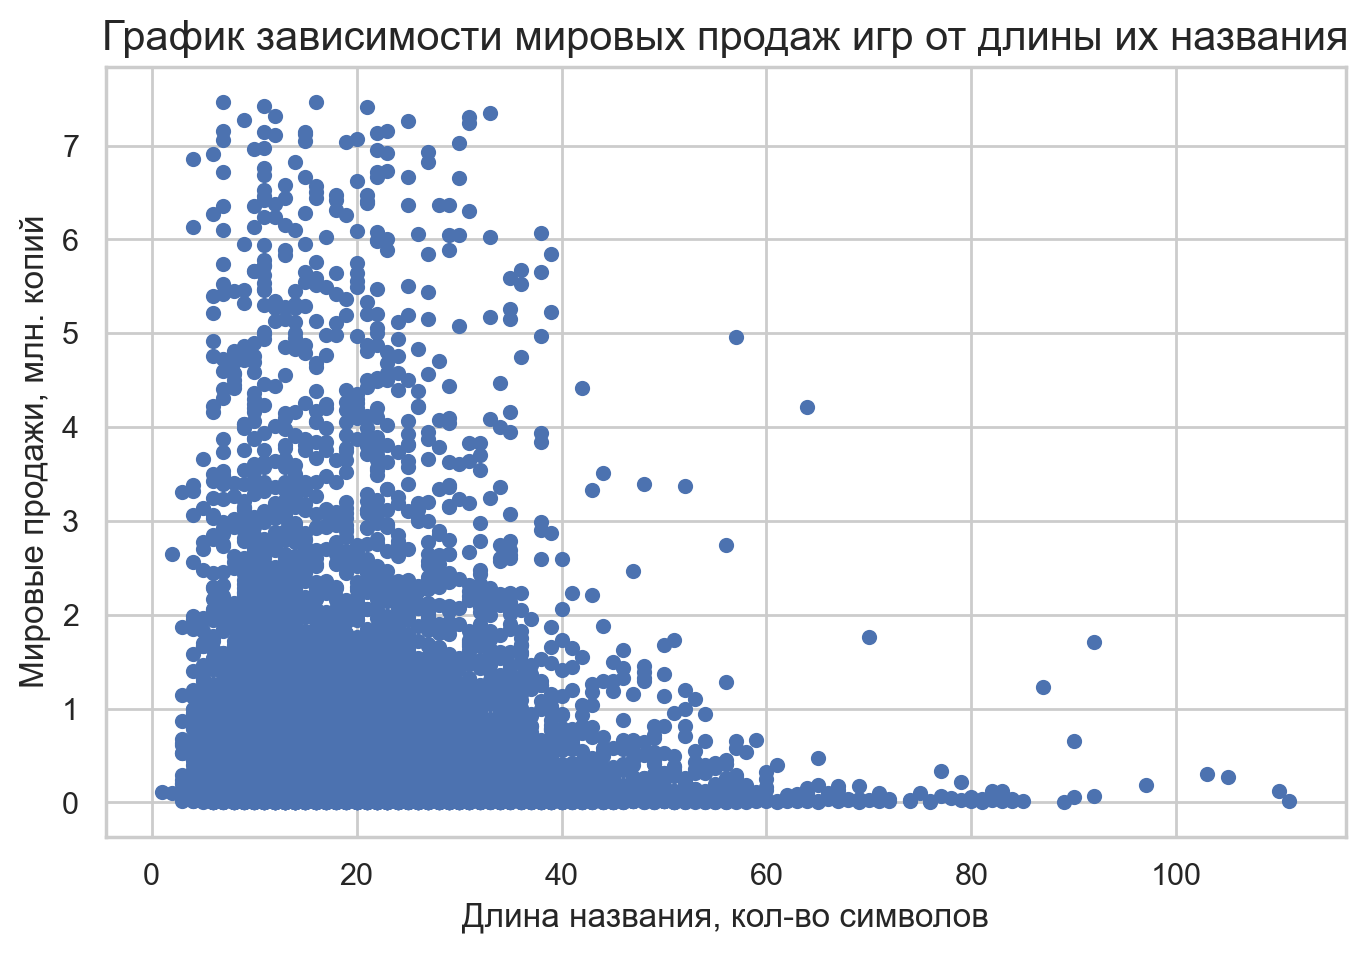

In [111]:
df_new.plot.scatter(x = 'Name_length', y = 'Global_Sales')
plt.title('График зависимости мировых продаж игр от длины их названия', size = 15)
plt.xlabel('Длина названия, кол-во символов')
plt.ylabel('Мировые продажи, млн. копий')

Из нового графика видно, что опять таки большая часть данных по показателю продаж находится ниже 7.5 млн копий. Построим новый датасет с ограничением и аналогичный график для нее.

In [49]:
df_new = df_new[df_new['Global_Sales'] < 7.5]
df_new

Name  Global_Sales  Name_length
0                                  '98 Koshien          0.41           10
1                   .hack//G.U. Vol.1//Rebirth          0.17           25
2                 .hack//G.U. Vol.2//Reminisce          0.23           27
3      .hack//G.U. Vol.2//Reminisce (jp sales)          0.16           36
4                .hack//G.U. Vol.3//Redemption          0.17           28
...                                        ...           ...          ...
11320                       thinkSMART FAMILY!          0.03           17
11321               thinkSMART: Chess for Kids          0.01           23
11322                             uDraw Studio          2.46           11
11323             uDraw Studio: Instant Artist          0.21           25
11324             ¡Shin Chan Flipa en colores!          0.14           24

[11167 rows x 3 columns]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


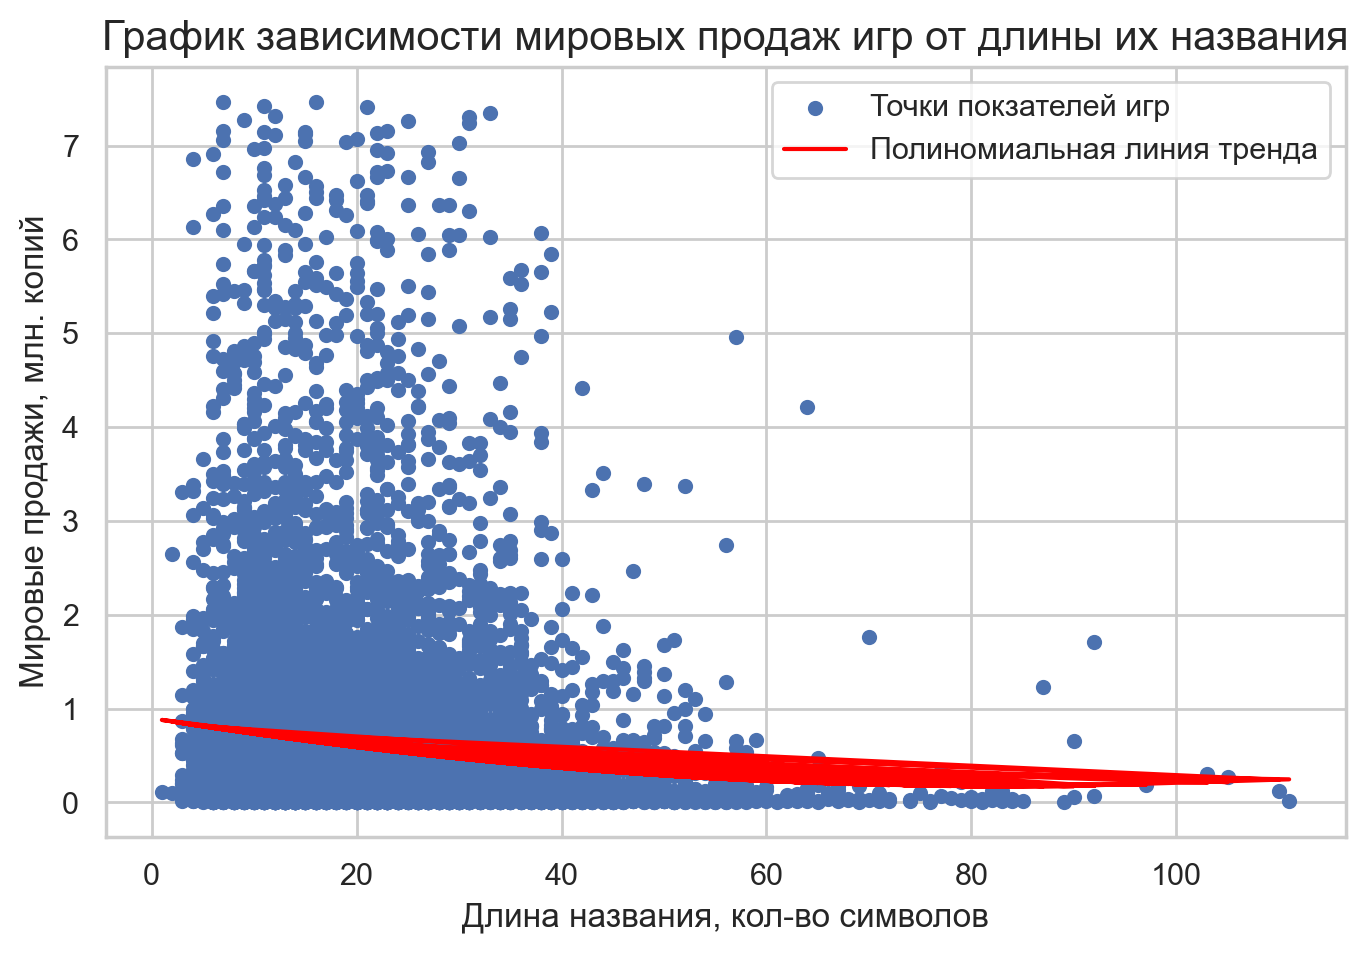

In [113]:
df_new.plot.scatter(x = 'Name_length', y = 'Global_Sales')
z = np.polyfit (df_new['Name_length'], df_new['Global_Sales'], 2 )
p = np.poly1d (z)
plt.plot (df_new['Name_length'], p(df_new['Name_length']), color = 'red')
plt.title('График зависимости мировых продаж игр от длины их названия', size = 15)
plt.xlabel('Длина названия, кол-во символов')
plt.ylabel('Мировые продажи, млн. копий')
plt.legend(loc = 'upper right', labels = ['Точки покзателей игр', 'Полиномиальная линия тренда'])

Из данного графика мы можем сделать предположение о том, что существует обратная связь между длиной названия игры и ее общемировыми продажами (это видно и по красной полиномиальной линии тренда).

- 4.2.5 **Рассмотрим взаимосвязь между количеством проданных игр в Северной Америке и во всем мире**

Ранее мы уже утверждали, что связь между данными показателями сильна, проверим это на диаграмме рассеяния. Для этого создадим отдельный датасет с тремя колонками из изначальной таблицы и проделаем с ними аналогичные предыдущему пункту операции.

In [51]:
df_na = df[['Name', 'NA_Sales', 'Global_Sales']].copy()
df_na = df_na.groupby('Name').sum().reset_index()
df_na

Name  NA_Sales  Global_Sales
0                                  '98 Koshien      0.15          0.41
1                   .hack//G.U. Vol.1//Rebirth      0.00          0.17
2                 .hack//G.U. Vol.2//Reminisce      0.11          0.23
3      .hack//G.U. Vol.2//Reminisce (jp sales)      0.00          0.16
4                .hack//G.U. Vol.3//Redemption      0.00          0.17
...                                        ...       ...           ...
11320                       thinkSMART FAMILY!      0.03          0.03
11321               thinkSMART: Chess for Kids      0.01          0.01
11322                             uDraw Studio      1.67          2.46
11323             uDraw Studio: Instant Artist      0.09          0.21
11324             ¡Shin Chan Flipa en colores!      0.00          0.14

[11325 rows x 3 columns]

Заметим, что в некоторых строчках в Северной Америке нулевые продажи. Удалим данные строки.

In [52]:
df_na = df_na[df_na.NA_Sales != 0.00]
df_na

Name  NA_Sales  Global_Sales
0                       '98 Koshien      0.15          0.41
2      .hack//G.U. Vol.2//Reminisce      0.11          0.23
5           .hack//Infection Part 1      0.49          1.27
7            .hack//Mutation Part 2      0.23          0.68
8            .hack//Outbreak Part 3      0.14          0.46
...                             ...       ...           ...
11319                    thinkSMART      0.09          0.10
11320            thinkSMART FAMILY!      0.03          0.03
11321    thinkSMART: Chess for Kids      0.01          0.01
11322                  uDraw Studio      1.67          2.46
11323  uDraw Studio: Instant Artist      0.09          0.21

[7730 rows x 3 columns]

Теперь можно нарисовать диаграмму рассеяния

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Мировые продажи, млн. копий')

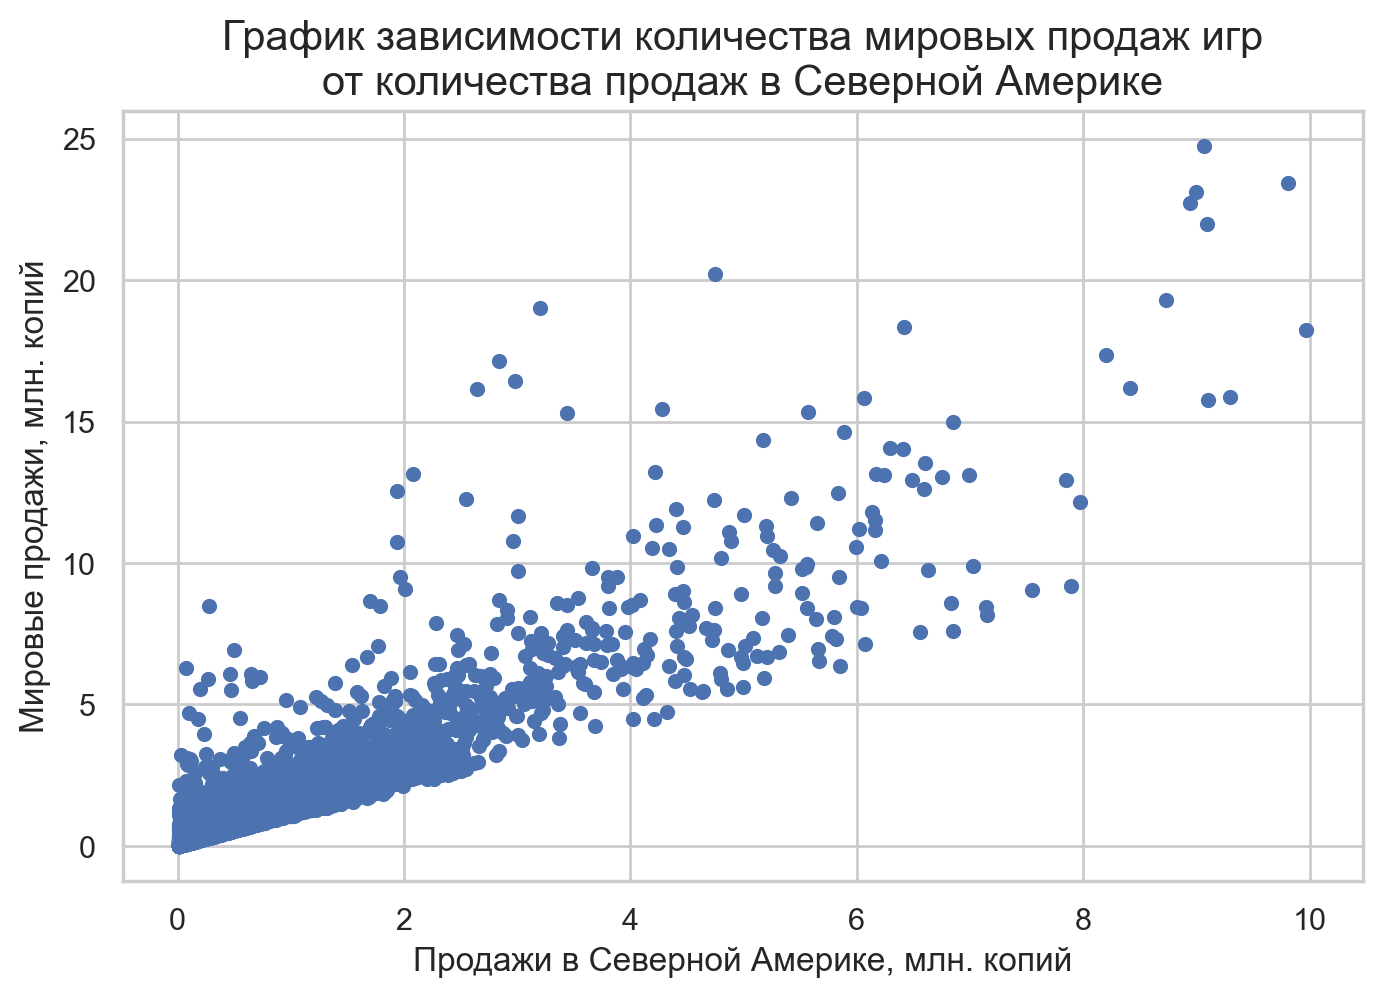

In [114]:
df_na.plot.scatter(x = 'NA_Sales', y = 'Global_Sales')
plt.title('График зависимости количества мировых продаж игр\nот количества продаж в Северной Америке', size = 15)
plt.xlabel('Продажи в Северной Америке, млн. копий')
plt.ylabel('Мировые продажи, млн. копий')

Видно, что большая часть данных находится в пределе до 10 млн проданных копий в Северной Америке. Применим данное ограничение и нарисуем новую диаграмму

In [54]:
df_na = df_na[df_na['NA_Sales'] < 10]
df_na

Name  NA_Sales  Global_Sales
0                       '98 Koshien      0.15          0.41
2      .hack//G.U. Vol.2//Reminisce      0.11          0.23
5           .hack//Infection Part 1      0.49          1.27
7            .hack//Mutation Part 2      0.23          0.68
8            .hack//Outbreak Part 3      0.14          0.46
...                             ...       ...           ...
11319                    thinkSMART      0.09          0.10
11320            thinkSMART FAMILY!      0.03          0.03
11321    thinkSMART: Chess for Kids      0.01          0.01
11322                  uDraw Studio      1.67          2.46
11323  uDraw Studio: Instant Artist      0.09          0.21

[7703 rows x 3 columns]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


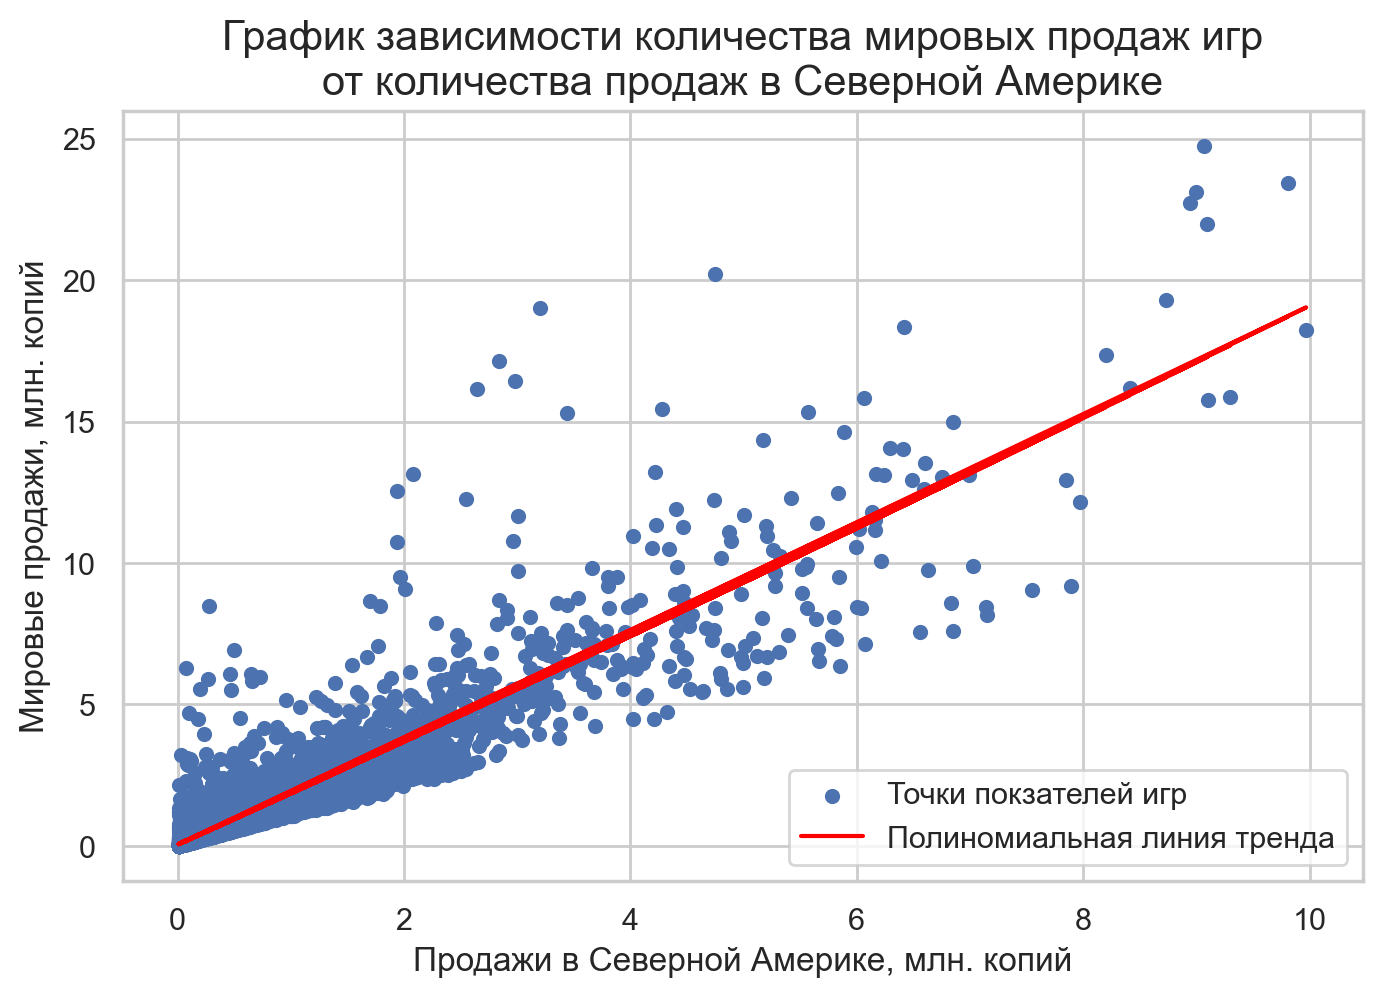

In [115]:
df_na.plot.scatter(x = 'NA_Sales', y = 'Global_Sales')
z = np.polyfit (df_na['NA_Sales'], df_na['Global_Sales'], 2 )
p = np.poly1d (z)
plt.plot (df_na['NA_Sales'], p(df_na['NA_Sales']), color = 'red')
plt.title('График зависимости количества мировых продаж игр\nот количества продаж в Северной Америке', size = 15)
plt.xlabel('Продажи в Северной Америке, млн. копий')
plt.ylabel('Мировые продажи, млн. копий')
plt.legend(loc = 'lower right', labels = ['Точки покзателей игр', 'Полиномиальная линия тренда'])

На данном графике мы действительно можем заметить положительную зависимость количества проданных игр во всем мире от количества проданных игр в Северной Америке (это видно и по красной полиномиальной линии тренда).

- 4.2.6 **Рассмотрим взаимосвязь между жанром и продажами за все года**

Заметим, что на графике 4.2.2.2 в последние несколько лет наблюдался рост продаж игр в жанре 'Экшен' и это может стать тенденцией на последуюшие года.

## Шаг 6: гипотезы

На данный момент мы имеем следуюшие 3 гипотезы, которые были отмечены в пунктах 4.2.4-4.2.6:

1. Начиная с n-го символа в своем названии игра начинает терять в продажах. 

2. Продажи игр на Северо-Американском рынке имеют положительные тенденции влияния на общемировые продажи. В будудщем это может сильно сказаться на тенденции развития игровой индустрии и внести северо-американские предпочтения в разработки.

3. Жанр 'Экшен' также имеет положительное влияние на общемировые продажи. Данный жанр может стать основным в ближайшие годы.

Все данные гипотезы мы собираемся проверить. И далее на их основе построить ML-модель, предсказывающую основные жанры, длины названий и мировые продажи соответствующих игр (регрессионная модель). Для каждой из гипотез мы также хотим построить кластеризацию, чтобы выделить основные группы, имеющие наибольшее влияние на игровую индустрию. 

Заранее обозначим, что мы будем использовать уровень значимости $\alpha = 5$%

- 6.1 **Проверка 1-ой гипотезы**

Давайте для начала проверим, а есть ли между длиной названия игры и ее продажами зависимость, так как по полученному ранее в пункте 4.2.4 графику нельзя с уверенностью судить об этом. Для этого воспользуемся $\chi ^2$ тестом на независимость. Сформулируем гипотезы для проверки:

- $H_0:$ показатели мировых продаж и длины названий игр независимы
- $H_1:$ показатели мировых продаж и длины названий игр связаны между собой

Как обычно подготовим необходимые данные: объединим данные по суммарным продажам и длине названий в один массив.

In [133]:
merged = np.array([df['Global_Sales'] * 1000000, df['Name_length']])
merged

array([[4.31e+06, 2.70e+05, 1.05e+06, ..., 1.00e+04, 1.00e+04, 2.90e+05],
       [9.00e+00, 6.00e+00, 8.00e+00, ..., 2.90e+01, 4.10e+01, 2.00e+01]])

Проведем $\chi ^2$ тест, выведем p-value и посмотрим опровергнется ли нулевая гипотеза

In [135]:
from scipy.stats import chi2_contingency

res = chi2_contingency(merged)

print(f'Значение p-value: {res[1]}')

if (res[1] < 0.05):
    print(f'Нулевая гипотеза отвергается')
else:
    print(f'Нулевая гипотеза не отвергается')

Значение p-value: 0.0
Нулевая гипотеза отвергается


Видим, что нулевая гипотеза отвергается, то есть связь между переменными есть. 

- 6.2 **Проверка 2-ой гипотезы**

Фактически мы хотим узнать существует ли прямая (или близкая к ней) зависимость между мировыми продажами и продажами в Северной Америке. Для этого нам подойдет коэффициент корреляции Пирсона. Сформулируем гипотезы для проверки:

- $H_0:$ между продажами в Северной Америке и мировыми продажами есть статистически значимая положительная связь
- $H_1:$ между продажами в Северной Америке и мировыми продажами нет статистически значимой положительной связи

Запишем данные о продажах в списки для дальнейшего испольщования в тесте

In [120]:
na_sales = df['NA_Sales'].tolist()
w_sales = df['Global_Sales'].tolist()

Проведем корреляционный тест Пирсона и выведем получившиеся значения коэффициента корреляции и значения p-value. Далее сравним получившееся значение p-value с уровнем значимости и поймем отвергается ли наша нулевая гипотеза.

In [122]:
from scipy.stats import pearsonr

res = pearsonr(na_sales, w_sales)

print(f'Коэффициент корреляции Пирсона: {res[0]}')
print(f'Двустороннее значение p-value: {res[1]}')

if (res[1] < 0.05):
    print(f'Нулевая гипотеза не отвергается')
else:
    print(f'Нулевая гипотеза отвергается')

Коэффициент корреляции Пирсона: 0.9412692156419095
Двустороннее значение p-value: 0.0
Нулевая гипотеза не отвергается


Получившейся результат более чем поражающий, так как коэффициент корреляции Пирсона очень близок к 1, что значит что между продажами игр в Северной Америке и мировыми продажами очень сильная положительная зависимость близкая к линейной, к тому же из-за почти нулевого p-value мы может быть уверены, что получившийся результат статистически значим. Таким образом, можно сделать вывод, что продажи в Северной Америке действительно имеют сильное влияние на мировые продажи, что в свою очередь говорит о том, что предпочтения северо-американских игроков имеют сильное влияние на производство и нынешний вид игр, так как бкомпании, стремящиеся максимизировать продажи, хотят угодить именно данной аудитории.

## Шаг 7: машинное обучение

По полученным ранее результатам гипотез и нашим наблюдениям мы хотим построить модель, которая сможет предсказывать мировые продажи игр по следующим данным: длина названия, количество просмотров на твиче и продажи в Северной Америке. Для получения данных по твичу возьмем отдельный датафрейм, который мы получили ранее с пощью парсинга.

In [197]:
df_dop = pd.read_csv('Both (1).csv', sep=',')
df_dop.head()

Unnamed: 0                    Name  NA_Sales  EU_Sales  JP_Sales  \
0           0             .hack//Link      0.00      0.00      0.14   
1           1              007 Racing      0.30      0.20      0.00   
2           2               1 vs. 100      0.08      0.00      0.00   
3           3      10 Minute Solution      0.06      0.01      0.00   
4           4  100 All-Time Favorites      0.35      0.12      0.00   

   Other_Sales  Global_Sales  Watch time (hours)  Streamers  Average channels  
0         0.00          0.14          259.000000  12.750000               0.0  
1         0.03          0.53          103.666667   7.166667               0.0  
2         0.01          0.09          121.333333   1.333333               0.0  
3         0.01          0.08            3.000000   2.000000               0.0  
4         0.04          0.51            8.000000   1.000000               0.0

Добавим дополнительно сюда колонку с длинами названий игр

In [198]:
df_dop['Name_length'] = df_dop['Name'].str.len() - df_dop['Name'].str.count(' ')
df_dop

Unnamed: 0                          Name  NA_Sales  EU_Sales  JP_Sales  \
0              0                   .hack//Link      0.00      0.00      0.14   
1              1                    007 Racing      0.30      0.20      0.00   
2              2                     1 vs. 100      0.08      0.00      0.00   
3              3            10 Minute Solution      0.06      0.01      0.00   
4              4        100 All-Time Favorites      0.35      0.12      0.00   
...          ...                           ...       ...       ...       ...   
7628        7628                      inFAMOUS      1.76      0.69      0.12   
7629        7629                    inFAMOUS 2      1.05      0.49      0.08   
7630        7630          inFAMOUS: Second Son      1.27      0.97      0.07   
7631        7631                  uDraw Studio      1.67      0.58      0.00   
7632        7632  uDraw Studio: Instant Artist      0.09      0.10      0.00   

      Other_Sales  Global_Sales  Watch time (hours)    Streamers  \
0            0.00          0.14          259.000000    12.750000   
1            0.03          0.53          103.666667     7.166667   
2            0.01          0.09          121.333333     1.333333   
3            0.01          0.08            3.000000     2.000000   
4            0.04          0.51            8.000000     1.000000   
...           ...           ...                 ...          ...   
7628         0.37          2.94        35787.571429   232.428571   
7629         0.23          1.85        25047.428571   111.714286   
7630         0.47          2.78       101353.571429  5567.571429   
7631         0.20          2.46           27.111111     1.555556   
7632         0.02          0.21           28.333333     3.666667   

      Average channels  Name_length  
0             0.000000           11  
1             0.000000            9  
2             0.000000            7  
3             0.000000           16  
4             0.000000           20  
...                ...          ...  
7628          0.000000            8  
7629          0.000000            9  
7630          0.285714           18  
7631          0.000000           11  
7632          0.000000           25  

[7633 rows x 11 columns]

Дополнительно отметим, что количество рассматриваемых игр действительно уменьшилось, что произошло из-за дополнительного столбца данных с просмотрами на твиче, что нормально так как во многие игры почти никогда не играли на стримах. Кроме того, имеющейся выборки также вполне хватит для постройки модели.

Составим новый фрейм данных в котором будут только те столбцы, что нам нужны.

In [199]:
df_n = df_dop[['Name', 'NA_Sales', 'Global_Sales', 'Name_length', 'Watch time (hours)']]
df_n['Global_Sales'] = df_n['Global_Sales'] * 1000000
df_n

Name  NA_Sales  Global_Sales  Name_length  \
0                      .hack//Link      0.00      140000.0           11   
1                       007 Racing      0.30      530000.0            9   
2                        1 vs. 100      0.08       90000.0            7   
3               10 Minute Solution      0.06       80000.0           16   
4           100 All-Time Favorites      0.35      510000.0           20   
...                            ...       ...           ...          ...   
7628                      inFAMOUS      1.76     2940000.0            8   
7629                    inFAMOUS 2      1.05     1850000.0            9   
7630          inFAMOUS: Second Son      1.27     2780000.0           18   
7631                  uDraw Studio      1.67     2460000.0           11   
7632  uDraw Studio: Instant Artist      0.09      210000.0           25   

      Watch time (hours)  
0             259.000000  
1             103.666667  
2             121.333333  
3               3.000000  
4               8.000000  
...                  ...  
7628        35787.571429  
7629        25047.428571  
7630       101353.571429  
7631           27.111111  
7632           28.333333  

[7633 rows x 5 columns]

Разделим нашу выборку на обучающую и тестовую

In [200]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(df_n, test_size = 0.3, random_state = 42)
data_train #обучающая выборка

Name  NA_Sales  Global_Sales  Name_length  \
2818             Hey Arnold! The Movie      0.19      260000.0           18   
4740              Phantasy Star Online      0.00      200000.0           18   
1710               Downhill Domination      0.23      470000.0           18   
3641    Mana Khemia 2: Fall of Alchemy      0.07      200000.0           25   
4633                       OverBlood 2      0.00       70000.0           10   
...                                ...       ...           ...          ...   
5226                           Rewrite      0.00       10000.0            7   
5390         S.T.A.L.K.E.R.: Clear Sky      0.00       40000.0           23   
860      Cabela's Big Game Hunter 2010      2.20     2370000.0           25   
7603  Zone of the Enders HD Collection      0.35      630000.0           27   
7270     Warhammer 40,000: Dawn of War      0.01       50000.0           25   

      Watch time (hours)  
2818        11290.166667  
4740        42199.285714  
1710         1949.142857  
3641          759.666667  
4633          951.714286  
...                  ...  
5226         1101.500000  
5390       310405.571429  
860            12.600000  
7603         4337.400000  
7270        78011.714286  

[5343 rows x 5 columns]

In [201]:
data_test #тестовая выборка

Name  NA_Sales  Global_Sales  Name_length  \
683                           Bombastic      0.03       50000.0            9   
4669                     Panzer Dragoon      0.00      370000.0           13   
4264                   NBA ShootOut '97      0.35      620000.0           14   
2484             Giants: Citizen Kabuto      0.03       60000.0           20   
4731       Petz Fantasy: Sunshine Magic      0.07       80000.0           25   
...                                 ...       ...           ...          ...   
6174                     Super Mario 64      5.08    10420000.0           12   
5784  Smash Court Tennis Pro Tournament      0.08      170000.0           29   
2968                   Inazuma Eleven 3      0.00       90000.0           14   
3992             Monster Hunter Freedom      0.24     1350000.0           20   
5037                        RPG Maker 3      0.03       60000.0            9   

      Watch time (hours)  
683         8.285714e+03  
4669        6.226000e+03  
4264        7.500000e+00  
2484        1.127800e+04  
4731        8.500000e+00  
...                  ...  
6174        8.563910e+06  
5784        1.600000e+01  
2968        8.288571e+02  
3992        7.511143e+03  
5037        1.928000e+02  

[2290 rows x 5 columns]

Построим гистограмму распределения мировых продаж и посмотрим нет ли у нее тяжелого хвоста

[Text(0, 0.5, 'Количество в выборке'),
 Text(0.5, 0, 'Стоимость (в долларах США)')]

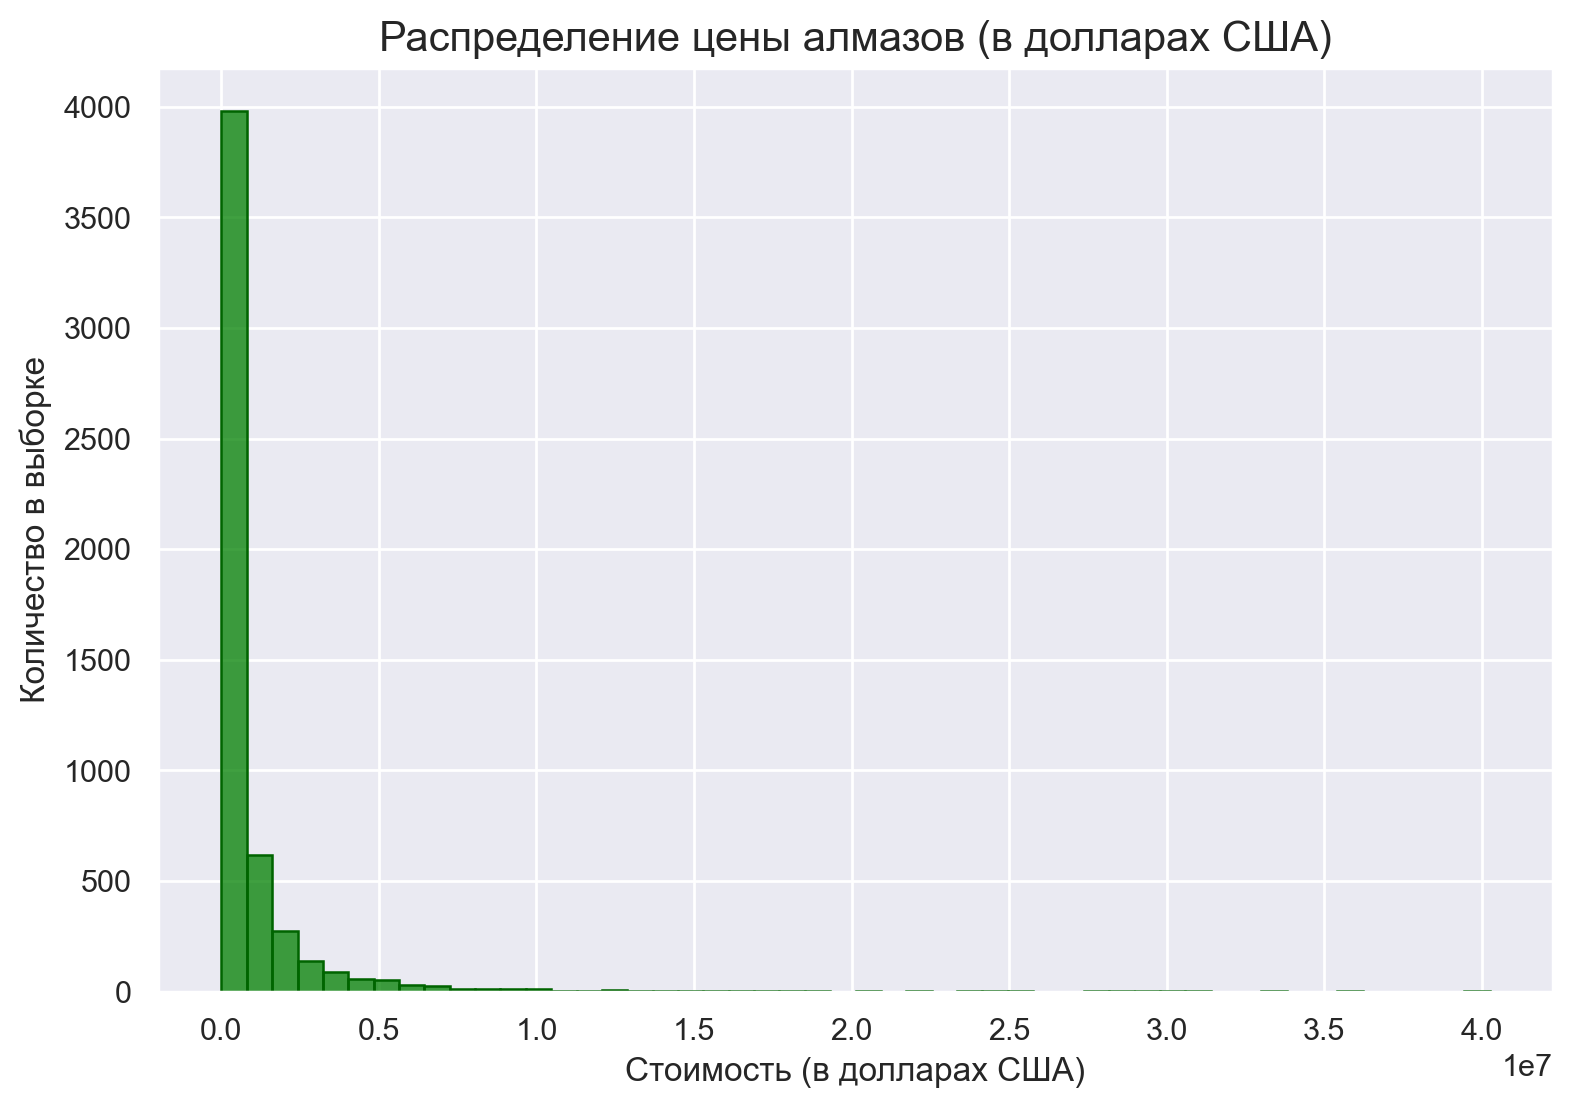

In [202]:
y = data_train['Global_Sales']
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.format'] = 'pdf'

fig, ax = plt.subplots(figsize=(9, 6))
ax.set_title('Распределение цены алмазов (в долларах США)', fontsize=15)
sns.histplot(y,
             bins=50,
             ax=ax, 
             color='green',
             edgecolor='darkgreen');
ax.set (ylabel='Количество в выборке', xlabel='Стоимость (в долларах США)')

Видно, что конец действительно слишком тяжелый, в связи с чем давайте его пролагорифмируем.

In [203]:
y_ln = y.copy()
y_ln = np.log(y_ln)
y_ln

2818    12.468437
4740    12.206073
1710    13.060488
3641    12.206073
4633    11.156251
          ...    
5226     9.210340
5390    10.596635
860     14.678401
7603    13.353475
7270    10.819778
Name: Global_Sales, Length: 5343, dtype: float64

Нарисуем новый график для логарифмированных продаж.

[Text(0, 0.5, 'Количество в выборке'),
 Text(0.5, 0, 'Логарифмированная стоимость (в долларах США)')]

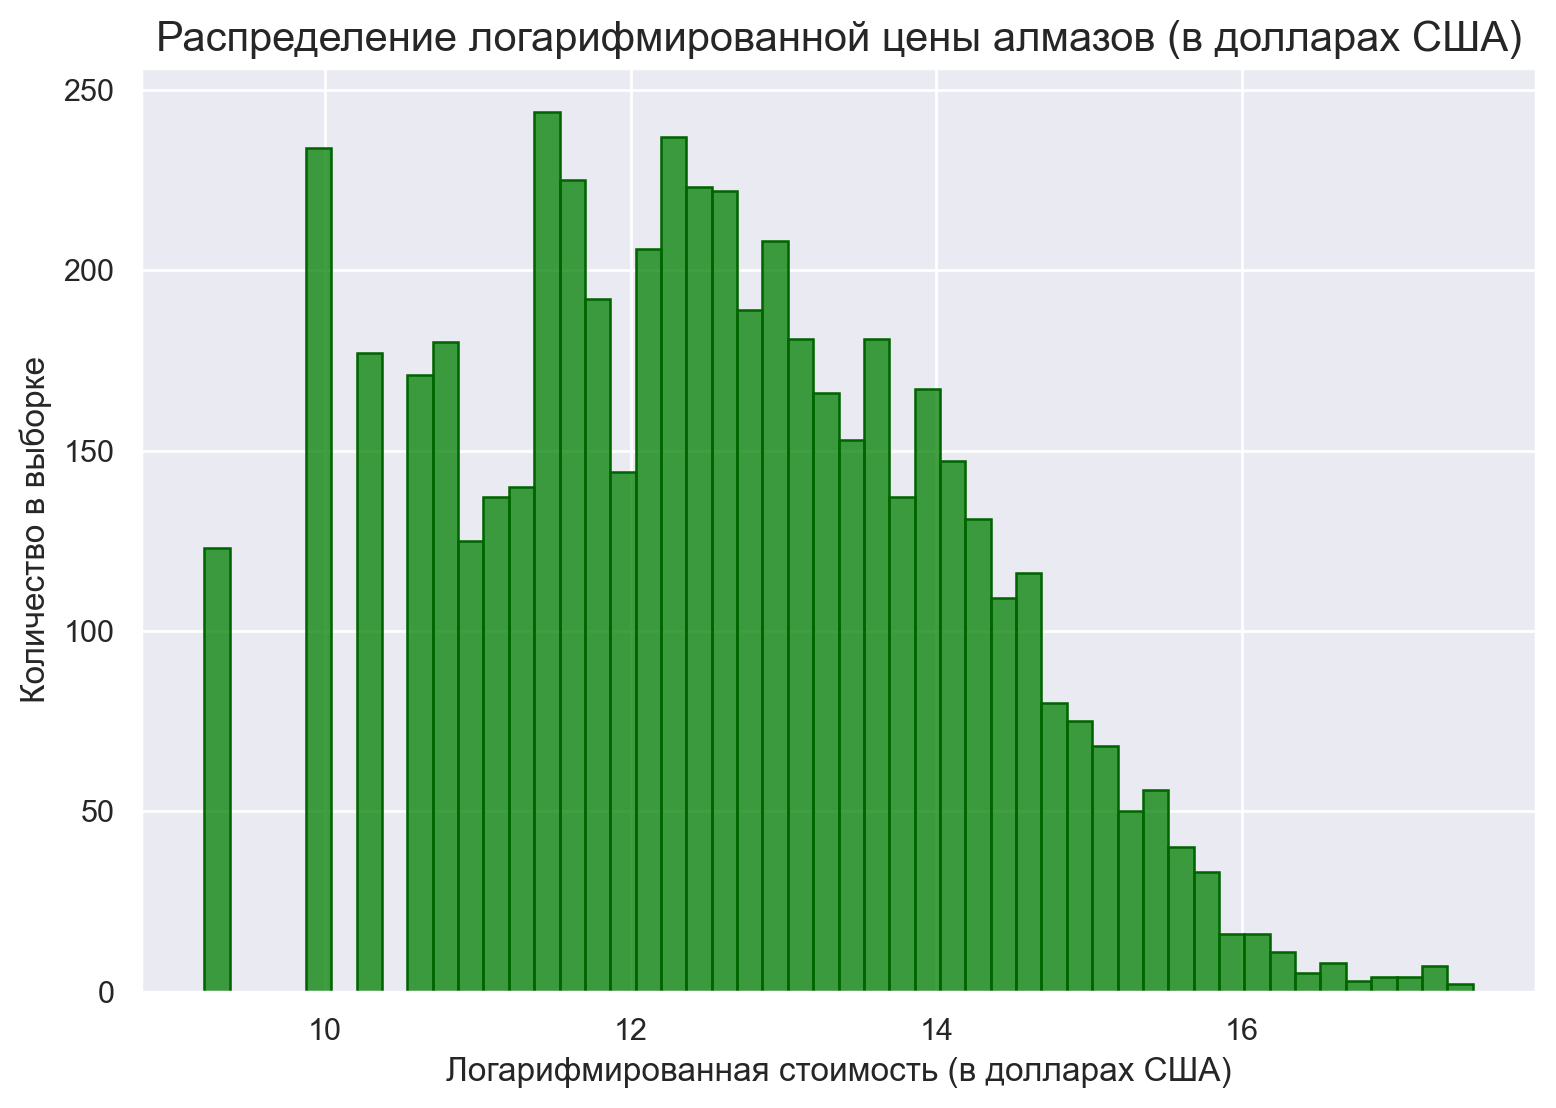

In [204]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_title('Распределение логарифмированной цены алмазов (в долларах США)', fontsize=15)
sns.histplot(y_ln,
             bins=50,
             ax=ax, 
             color='green',
             edgecolor='darkgreen');
ax.set (ylabel='Количество в выборке', xlabel='Логарифмированная стоимость (в долларах США)')

Видно, что распределение сильно улучшилось и уже нет столь тяжелых хвостов.

Давайте приравняем реальные стоимости к логарифмированным.

In [205]:
data_train['Global_Sales'] = y_ln
data_train

Name  NA_Sales  Global_Sales  Name_length  \
2818             Hey Arnold! The Movie      0.19     12.468437           18   
4740              Phantasy Star Online      0.00     12.206073           18   
1710               Downhill Domination      0.23     13.060488           18   
3641    Mana Khemia 2: Fall of Alchemy      0.07     12.206073           25   
4633                       OverBlood 2      0.00     11.156251           10   
...                                ...       ...           ...          ...   
5226                           Rewrite      0.00      9.210340            7   
5390         S.T.A.L.K.E.R.: Clear Sky      0.00     10.596635           23   
860      Cabela's Big Game Hunter 2010      2.20     14.678401           25   
7603  Zone of the Enders HD Collection      0.35     13.353475           27   
7270     Warhammer 40,000: Dawn of War      0.01     10.819778           25   

      Watch time (hours)  
2818        11290.166667  
4740        42199.285714  
1710         1949.142857  
3641          759.666667  
4633          951.714286  
...                  ...  
5226         1101.500000  
5390       310405.571429  
860            12.600000  
7603         4337.400000  
7270        78011.714286  

[5343 rows x 5 columns]

In [206]:
data_test['Global_Sales'] = np.log(data_test['Global_Sales'])
data_test

Name  NA_Sales  Global_Sales  Name_length  \
683                           Bombastic      0.03     10.819778            9   
4669                     Panzer Dragoon      0.00     12.821258           13   
4264                   NBA ShootOut '97      0.35     13.337475           14   
2484             Giants: Citizen Kabuto      0.03     11.002100           20   
4731       Petz Fantasy: Sunshine Magic      0.07     11.289782           25   
...                                 ...       ...           ...          ...   
6174                     Super Mario 64      5.08     16.159238           12   
5784  Smash Court Tennis Pro Tournament      0.08     12.043554           29   
2968                   Inazuma Eleven 3      0.00     11.407565           14   
3992             Monster Hunter Freedom      0.24     14.115615           20   
5037                        RPG Maker 3      0.03     11.002100            9   

      Watch time (hours)  
683         8.285714e+03  
4669        6.226000e+03  
4264        7.500000e+00  
2484        1.127800e+04  
4731        8.500000e+00  
...                  ...  
6174        8.563910e+06  
5784        1.600000e+01  
2968        8.288571e+02  
3992        7.511143e+03  
5037        1.928000e+02  

[2290 rows x 5 columns]

In [207]:
data_train = data_train[['NA_Sales', 'Global_Sales', 'Name_length', 'Watch time (hours)']]
data_test = data_test[['NA_Sales', 'Global_Sales', 'Name_length', 'Watch time (hours)']]

In [208]:
from sklearn.preprocessing import PolynomialFeatures

polinom_transform = PolynomialFeatures(2, include_bias=False)

data_test_p = polinom_transform.fit_transform(data_test)
data_train_p = polinom_transform.transform(data_train)

In [213]:
from sklearn.linear_model import LinearRegression


reg = LinearRegression().fit(np.array(data_train_p['NA_Sales', 'Name_length', 'Watch time (hours)']), np.array(data_train_p['Global_Sales']))
c = reg.coef_
d = reg.intercept_
c = np.insert(c, 0, d)
c

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices